### Let's first study about Image Histograms

A histogram represents the distribution of colors in an image. It can be visualized as a graph (or plot) that gives a high-level intuition of the intensity (pixel value) distribution. We are going to assume a RGB color space in this example, so these pixel values will be in the range of 0 to 255. If you are working in a different color space, the pixel range may be different.

When plotting the histogram, the X-axis serves as our “bins”. If we construct a histogram with 256 bins, then we are effectively counting the number of times each pixel value occurs. In contrast, if we use only 2 (equally spaced) bins, then we are counting the number of times a pixel is in the range [0, 128) or [128, 255]. The number of pixels binned to the X-axis value is then plotted on the Y-axis.

In [1]:
# Loading necessary library
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
import seaborn as sns
sns.set()

In [2]:
image=cv2.imread('grant.jpg')

**Rather than using lengthly commands again and again, let's create a function to display our image**

In [5]:
def display(img):
    plt.figure(figsize=(10,7))
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.xticks([])
    plt.yticks([])
    plt.show()

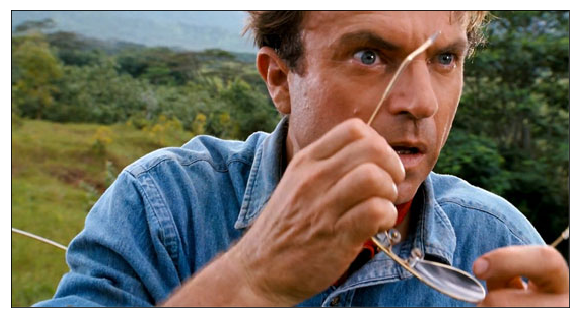

In [7]:
#The image is:
display(image)

In [11]:
# convert the image to grayscale and create a histogram
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

### A note- display(gray) won't work here as expected, because internally it's converting a BGR to RGB and prints only color images. There's a high chance that function won't come into use at all. But anyway, let's go on:

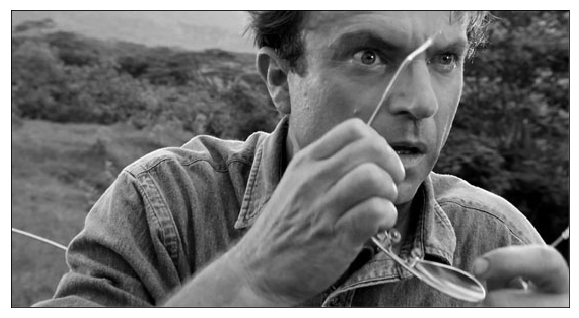

In [10]:
plt.figure(figsize=(10,7))
plt.imshow(gray, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

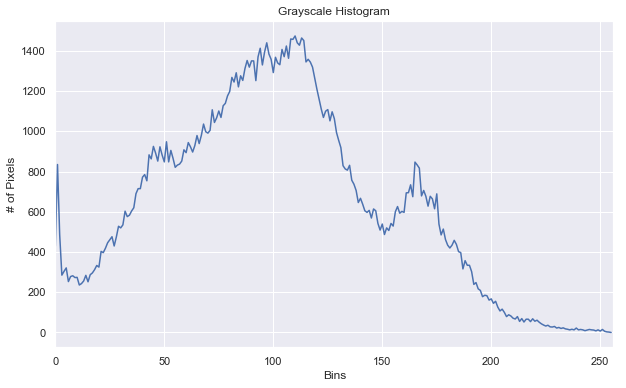

In [19]:
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.figure(figsize=(10,6))
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.xlim([0, 256])
plt.plot(hist);

### Let's see how pixel value histogram looks like for specific colours in our image. It's called "Flattened” color histogram:

Flattened feature vector size: 768


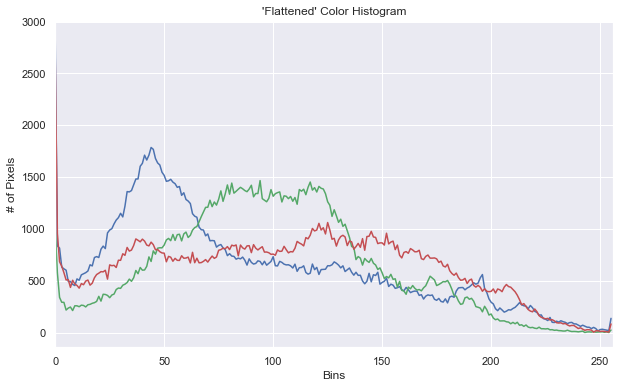

In [33]:
# grab the image channels, initialize the tuple of colors,
# the figure and the flattened feature vector
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure(figsize=(10,6))
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
features = []
 
# loop over the image channels
for (chan, color) in zip(chans, colors):
    # create a histogram for the current channel and
    # concatenate the resulting histograms for each
    # channel
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    features.extend(hist)

    # plot the histogram
    plt.plot(hist, color = color)
    plt.xlim([0, 256])

# here we are simply showing the dimensionality of the
# flattened color histogram 256 bins for each channel
# x 3 channels = 768 total values -- in practice, we would
# normally not use 256 bins for each channel, a choice
# between 32-96 bins are normally used, but this tends
# to be application dependent
print ("Flattened feature vector size: %d" % (np.array(features).flatten().shape))

### Multi-dimensional Histograms
Up until this point, we have computed a histogram for only one channel at a time. Now we move on to multi-dimensional histograms and take into consideration two channels at a time.

The way I like to explain multi-dimensional histograms is to use the word AND. For example, we can ask a question such as
“how many pixels have a Red value of 10 AND a Blue value of 30?” How many pixels have a Green value of 200 AND a Red value of 130? By using the conjunctive AND we are able to construct multi-dimensional histograms.

It’s that simple. Let’s checkout some code to automate the process of building a 2D histogram:

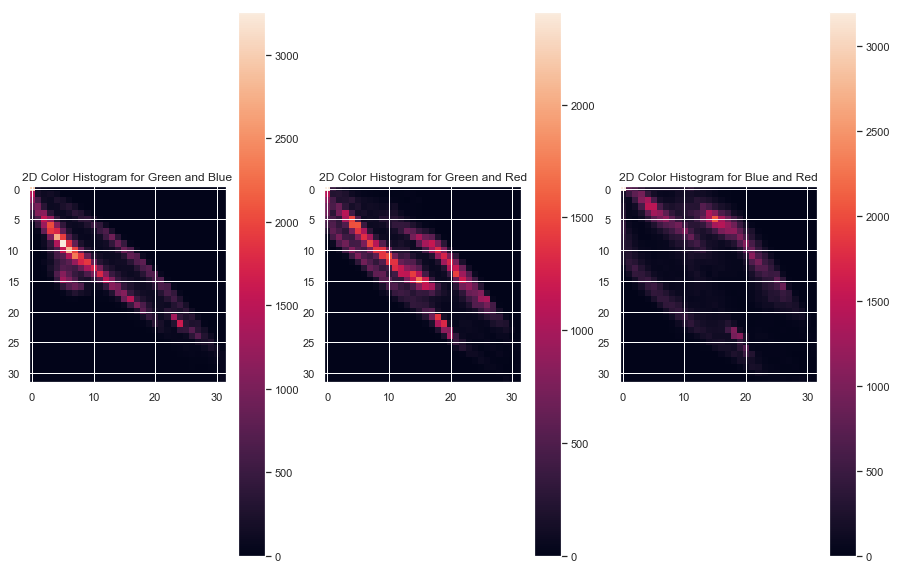

In [59]:
# let's move on to 2D histograms -- I am reducing the
# number of bins in the histogram from 256 to 32 so we
# can better visualize the results
fig = plt.figure(figsize=(15,10))
 
# plot a 2D color histogram for green and blue
ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None,[32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for Green and Blue")
plt.colorbar(p)
 
# plot a 2D color histogram for green and red
ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None,[32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for Green and Red")
plt.colorbar(p,)
 
# plot a 2D color histogram for blue and red
ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None,[32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for Blue and Red")
plt.colorbar(p)
plt.show()

# finally, let's examine the dimensionality of one of
# the 2D histograms
#print ("2D histogram shape: %s, with %d values" % (hist.shape, hist.flatten().shape[0]));

In the above Figure, we see three graphs. The first is a 2D color histogram for the Green and Blue channels, the second for Green and Red, and the third for Blue and Red. Shades of blue represent low pixel counts, whereas shades of red represent large pixel counts (i.e. peaks in the 2D histogram). We can see such a peak in the Green and Blue 2D histogram (the first graph) when X=5 and Y=10.